In [134]:
import pandas as pd
import numpy as np

In [135]:
df = pd.read_csv('./data/all_stats.csv')
player_val = pd.read_csv('./data/player_val_cleaned.csv')
player_wages = pd.read_csv('./data/player_wages.csv')

In [136]:
check = player_val['Player'].isin(df['Player'])
player_val[~check]

Empty DataFrame
Columns: [Unnamed: 0, #, Player, Nat., Age, Club, Highest value in career, Last update, Market value]
Index: []

In [137]:
player_val

Unnamed: 0    #           Player  Nat.  Age  Club Highest value in career  \
0            0    1   Erling Haaland   NaN   23   NaN                €180.00m   
1            1    2       Phil Foden   NaN   23   NaN                €130.00m   
2            2    3      Bukayo Saka   NaN   22   NaN                €130.00m   
3            3    4      Declan Rice   NaN   25   NaN                €110.00m   
4            4    5            Rodri   NaN   27   NaN                €110.00m   
..         ...  ...              ...   ...  ...   ...                     ...   
95          95   96    Harvey Barnes   NaN   26   NaN                 €35.00m   
96          96   97  Mykhailo Mudryk   NaN   23   NaN                 €60.00m   
97          97   98      Diogo Dalot   NaN   25   NaN                 €40.00m   
98          98   99  Dominic Solanke   NaN   26   NaN                 €35.00m   
99          99  100      Joe Willock   NaN   24   NaN                 €38.00m   

     Last update Market value  
0   Dec 19, 2023     €180.00m  
1   Mar 14, 2024     €130.00m  
2   Mar 14, 2024     €130.00m  
3   Dec 19, 2023     €110.00m  
4   Dec 19, 2023     €110.00m  
..           ...          ...  
95  Dec 19, 2023      €35.00m  
96  Mar 14, 2024      €35.00m  
97  Dec 19, 2023      €35.00m  
98  Mar 14, 2024      €35.00m  
99  Dec 19, 2023      €35.00m  

[100 rows x 9 columns]

In this notebook, my aim is to merge the original dataset with player valuation data. To achieve this, I'll start by merging the tables. Reflecting on the previous notebook where I attained a model with an RMSE of 15, I believe there is room for improvement. Therefore, I'm considering incorporating additional data on player wages to enhance the valuation process further.

### Merge and Clean the Data

In [138]:
df_merge = pd.merge(df, player_val[['Player','Market value']], on=['Player'], how='right')

In [139]:
# Preprocess the Market Value column
df_merge['Market value'] =(df_merge['Market value'].str.replace('€', '')
                              .str.replace('m', '')
                              .astype(float))

In [140]:
df_merge

Player  Tkl  TklW  Tkl.1   Tkl%  Lost  Blocks  Pass  Int  \
0    Erling Haaland    5     2      2  100.0     0       9     8    1   
1        Phil Foden   24    14     12   50.0    12      21    21   13   
2       Bukayo Saka   49    26     20   44.4    25      37    35   10   
3       Declan Rice   55    34     24   58.5    17      31    21   35   
4             Rodri   54    33     26   54.2    22      25    18   20   
..              ...  ...   ...    ...    ...   ...     ...   ...  ...   
95    Harvey Barnes    3     1      0    0.0     1       0     0    2   
96  Mykhailo Mudryk   18    11      8   34.8    15      10     9    4   
97      Diogo Dalot   56    36     35   72.9    13      34    22   27   
98  Dominic Solanke   17     9      7   41.2    10      20    16    3   
99      Joe Willock   10     6      4   40.0     6       5     5    1   

    Tkl+Int  ...  Age   90s Def 3rd  Mid 3rd  Att 3rd  TotDist  PrgDist  1/3  \
0         6  ...   23  21.4       0        3        2     2353      437   13   
1        37  ...   23  25.7      10        8        6    16235     3052   51   
2        59  ...   22  25.1      18       15       16    13843     3481   29   
3        90  ...   25  26.6      28       21        6    28518     7674  204   
4        74  ...   27  24.1      17       27       10    41853    11449  274   
..      ...  ...  ...   ...     ...      ...      ...      ...      ...  ...   
95        5  ...   26   4.0       1        2        0     1376      331    5   
96       22  ...   23  10.1       8        5        5     2995      994   16   
97       83  ...   25  25.3      41        8        7    18394     5755   77   
98       20  ...   26  27.7       1        9        7     3712      919   20   
99       11  ...   24   3.4       6        4        0     1628      478   10   

           Country  Market value  
0           Norway         180.0  
1   United Kingdom         130.0  
2   United Kingdom         130.0  
3   United Kingdom         110.0  
4            Spain         110.0  
..             ...           ...  
95  United Kingdom          35.0  
96         Ukraine          35.0  
97        Portugal          35.0  
98  United Kingdom          35.0  
99  United Kingdom          35.0  

[100 rows x 92 columns]

In [141]:
check = df_merge['Player'].isin(player_wages['Player'])
df_merge[~check]

Player  Tkl  TklW  Tkl.1  Tkl%  Lost  Blocks  Pass  Int  Tkl+Int  \
81  Sandro Tonali    7     7      3  33.3     6       3     3    2        9   

    ...  Age  90s Def 3rd  Mid 3rd  Att 3rd  TotDist  PrgDist  1/3  Country  \
81  ...   23  4.9       4        2        1     3776      870   16    Italy   

    Market value  
81          40.0  

[1 rows x 92 columns]

In [143]:
# Merge with player_wages
df_merge= pd.merge(df_merge,player_wages,on='Player',how='inner')

In [144]:
df_merge

Player  Tkl  TklW  Tkl.1   Tkl%  Lost  Blocks  Pass  Int  \
0    Erling Haaland    5     2      2  100.0     0       9     8    1   
1        Phil Foden   24    14     12   50.0    12      21    21   13   
2       Bukayo Saka   49    26     20   44.4    25      37    35   10   
3       Declan Rice   55    34     24   58.5    17      31    21   35   
4             Rodri   54    33     26   54.2    22      25    18   20   
..              ...  ...   ...    ...    ...   ...     ...   ...  ...   
94    Harvey Barnes    3     1      0    0.0     1       0     0    2   
95  Mykhailo Mudryk   18    11      8   34.8    15      10     9    4   
96      Diogo Dalot   56    36     35   72.9    13      34    22   27   
97  Dominic Solanke   17     9      7   41.2    10      20    16    3   
98      Joe Willock   10     6      4   40.0     6       5     5    1   

    Tkl+Int  ...   90s  Def 3rd Mid 3rd  Att 3rd  TotDist  PrgDist  1/3  \
0         6  ...  21.4        0       3        2     2353      437   13   
1        37  ...  25.7       10       8        6    16235     3052   51   
2        59  ...  25.1       18      15       16    13843     3481   29   
3        90  ...  26.6       28      21        6    28518     7674  204   
4        74  ...  24.1       17      27       10    41853    11449  274   
..      ...  ...   ...      ...     ...      ...      ...      ...  ...   
94        5  ...   4.0        1       2        0     1376      331    5   
95       22  ...  10.1        8       5        5     2995      994   16   
96       83  ...  25.3       41       8        7    18394     5755   77   
97       20  ...  27.7        1       9        7     3712      919   20   
98       11  ...   3.4        6       4        0     1628      478   10   

           Country  Market value  Weekly Wages  
0           Norway         180.0        375000  
1   United Kingdom         130.0        225000  
2   United Kingdom         130.0        195000  
3   United Kingdom         110.0        240000  
4            Spain         110.0        220000  
..             ...           ...           ...  
94  United Kingdom          35.0         80000  
95         Ukraine          35.0        100000  
96        Portugal          35.0         85000  
97  United Kingdom          35.0         50000  
98  United Kingdom          35.0         80000  

[99 rows x 93 columns]

In [146]:
df_merge.dtypes

Player           object
Tkl               int64
TklW              int64
Tkl.1             int64
Tkl%            float64
                 ...   
PrgDist           int64
1/3               int64
Country          object
Market value    float64
Weekly Wages      int64
Length: 93, dtype: object

In [147]:
# Select only the numeric columns 
df_numeric = df_merge.select_dtypes(include=['float64', 'int64'])

In [148]:
df_numeric

Tkl  TklW  Tkl.1   Tkl%  Lost  Blocks  Pass  Int  Tkl+Int  Clr  ...  Age  \
0     5     2      2  100.0     0       9     8    1        6   13  ...   23   
1    24    14     12   50.0    12      21    21   13       37   15  ...   23   
2    49    26     20   44.4    25      37    35   10       59   14  ...   22   
3    55    34     24   58.5    17      31    21   35       90   43  ...   25   
4    54    33     26   54.2    22      25    18   20       74   35  ...   27   
..  ...   ...    ...    ...   ...     ...   ...  ...      ...  ...  ...  ...   
94    3     1      0    0.0     1       0     0    2        5    1  ...   26   
95   18    11      8   34.8    15      10     9    4       22    6  ...   23   
96   56    36     35   72.9    13      34    22   27       83   84  ...   25   
97   17     9      7   41.2    10      20    16    3       20   34  ...   26   
98   10     6      4   40.0     6       5     5    1       11    1  ...   24   

     90s  Def 3rd  Mid 3rd  Att 3rd  TotDist  PrgDist  1/3  Market value  \
0   21.4        0        3        2     2353      437   13         180.0   
1   25.7       10        8        6    16235     3052   51         130.0   
2   25.1       18       15       16    13843     3481   29         130.0   
3   26.6       28       21        6    28518     7674  204         110.0   
4   24.1       17       27       10    41853    11449  274         110.0   
..   ...      ...      ...      ...      ...      ...  ...           ...   
94   4.0        1        2        0     1376      331    5          35.0   
95  10.1        8        5        5     2995      994   16          35.0   
96  25.3       41        8        7    18394     5755   77          35.0   
97  27.7        1        9        7     3712      919   20          35.0   
98   3.4        6        4        0     1628      478   10          35.0   

    Weekly Wages  
0         375000  
1         225000  
2         195000  
3         240000  
4         220000  
..           ...  
94         80000  
95        100000  
96         85000  
97         50000  
98         80000  

[99 rows x 88 columns]

In [180]:
correlation_matrix = df_numeric.corr()

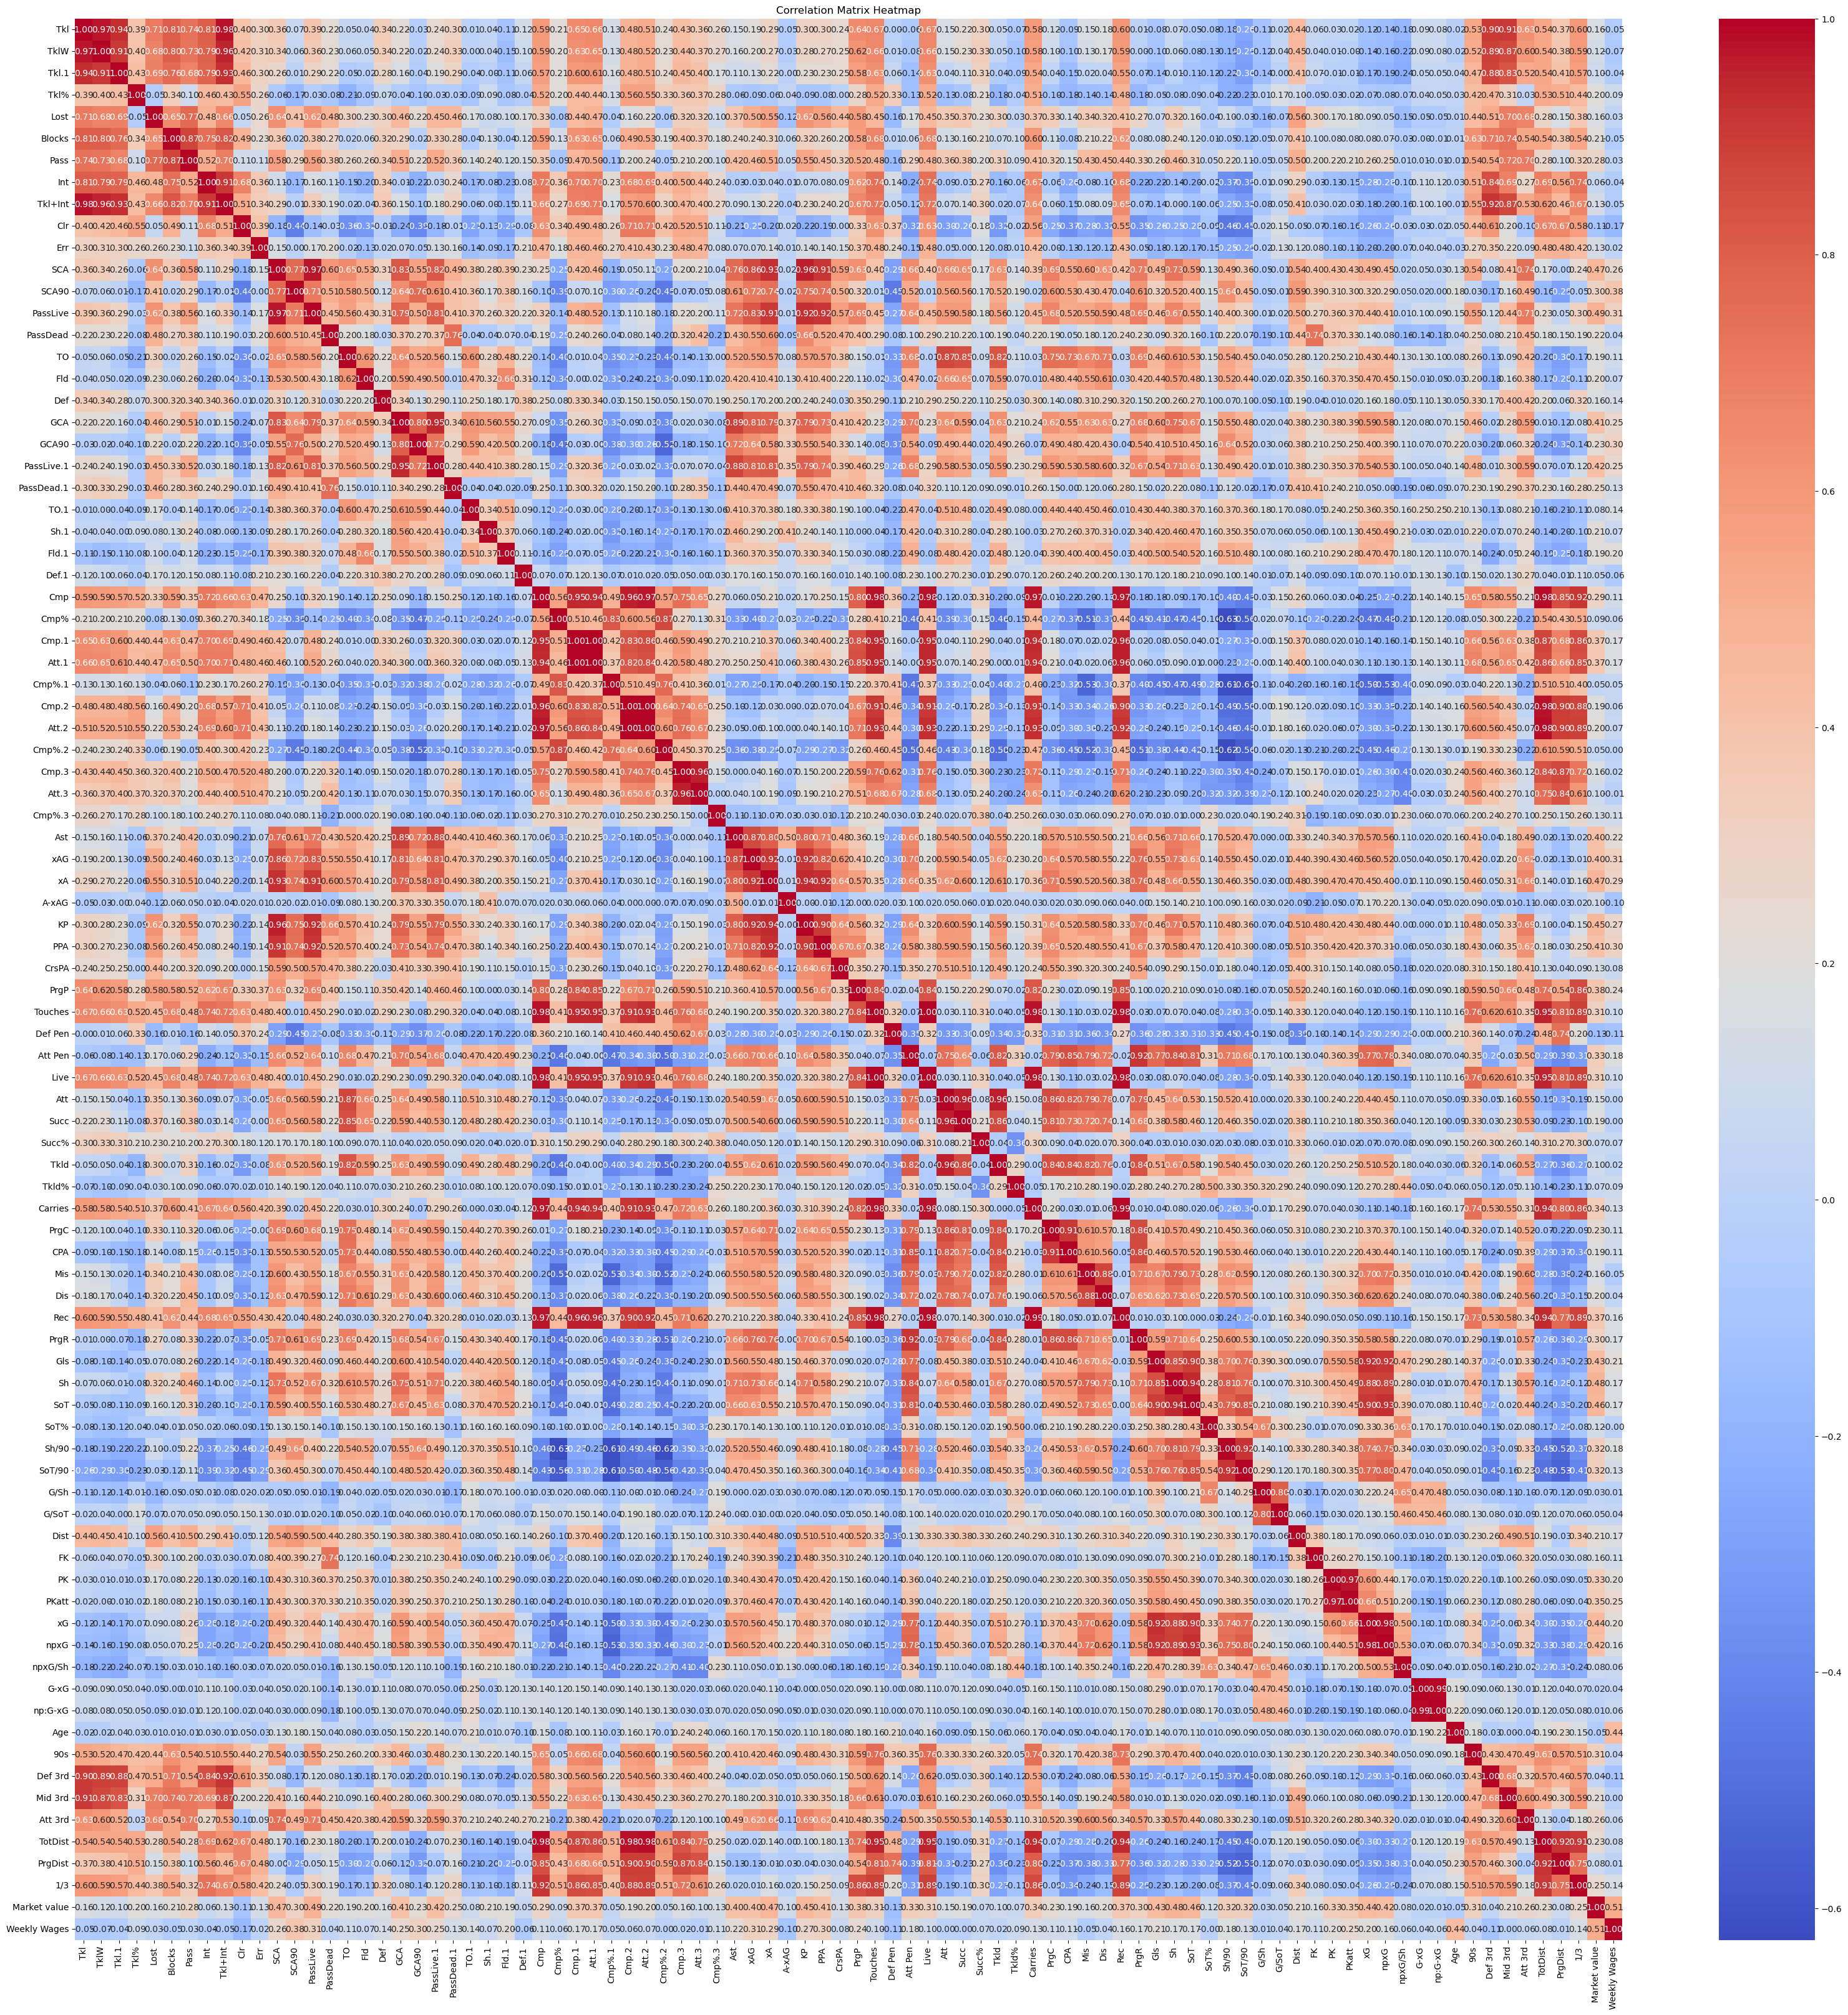

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Train the Data

In this project, I will use Root Mean Squared Error as the metrics. The reason is listed below:
- Interpretability: It's expressed in the same units as the target variable.
- Robustness: It's less sensitive to outliers compared to other metrics.
- Model Differentiation: Lower RMSE values indicate better model performance.
- Gradient-based Optimization: It aligns well with optimization algorithms.
- Error Magnitude: It quantifies the typical deviation of predictions from actual values.

In [169]:
from sklearn.model_selection import train_test_split

X = df_numeric.drop(columns=['Market value'])
y = df_numeric['Market value'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model performance using Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred,squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 105.04954660258328


In [174]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The initial model yielded unsatisfactory results with an RMSE of 310, likely due to the absence of data preprocessing. To address this, let's attempt to scale the data and reevaluate the model's performance.

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance using Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred,squared=False)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 113.01718902838414


After scaling the data, the outcome appears unchanged. Let's explore alternative models such as Ridge Regression to introduce regularization, as well as Decision Trees and XGBoost to assess if different modeling approaches yield improved results.

#### Ridge Regression

In [176]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Initialize the Ridge regression model and Gridsearch
ridge_model = Ridge()
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final Ridge model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Predict the target variable and evaluate

y_pred = best_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred,squared=False)

print("Root Mean Squared Error:", rmse)


Best Hyperparameters: {'alpha': 10.0}
Root Mean Squared Error: 28.775287832292584


#### Decision Tree Regressor

In [177]:
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for Decision Tree Regressor
param_grid_dt = {
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Initialize the Decision Tree Regressor model and GridSearch
dt_model = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='neg_mean_squared_error', cv=5)
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best hyperparameters for Decision Tree Regressor
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree Regressor:", best_params_dt)

# Train the final Decision Tree Regressor model with the best hyperparameters
best_dt_model = grid_search_dt.best_estimator_
best_dt_model.fit(X_train_scaled, y_train)

# Predict the target variable and evaluate
y_pred = best_dt_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred,squared=False)
print("Root Mean Squared Error for Decision Tree Regressor:", rmse)


Best Hyperparameters for Decision Tree Regressor: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Root Mean Squared Error for Decision Tree Regressor: 39.08212666936128


#### XGBoost Regressor

In [178]:
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7], 
    'min_child_weight': [1, 3, 5],  
    'subsample': [0.5, 0.7, 1.0], 
    'colsample_bytree': [0.5, 0.7, 1.0]  
}

# Initialize the XGBoost Regressor model and GridSearch
xgb_model = xgb.XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Train the final XGBoost model with the best hyperparameters
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Predict the target variable and evaluate
y_pred_xgb = best_xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_xgb,squared=False)

print("Root Mean Squared Error for XGBoost:", rmse)


Best Hyperparameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.5}
Root Mean Squared Error for XGBoost: 32.27426505064325


In [185]:
# Get feature importances
feature_importances = best_xgb_model.feature_importances_

# Create a DataFrame to store feature importances with their corresponding names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 20 features
top_20_features = feature_importance_df.head(20)

print("Top 20 Features:")
print(top_20_features)

Top 20 Features:
         Feature  Importance
59           Rec    0.099458
11           SCA    0.084028
13      PassLive    0.080422
44          PrgP    0.044629
29         Att.1    0.043563
28         Cmp.1    0.040942
83       TotDist    0.037462
45       Touches    0.032265
41            KP    0.031082
26           Cmp    0.030335
34         Cmp.3    0.025268
6           Pass    0.023809
71            PK    0.018959
18           GCA    0.018299
86  Weekly Wages    0.018053
58           Dis    0.017567
20    PassLive.1    0.015972
54       Carries    0.013423
85           1/3    0.013392
9            Clr    0.012635


The XGBoost regression model outperformed the Decision Tree regressor and Ridge Regression, yielding the lowest RMSE of 15.8 compared to 20.6 and 33.1, respectively. Therefore, the conclusion is that the XGBoost regressor is superior to the Decision Tree regressor, which in turn is better than Ridge Regression.

### Test the Model

In [16]:
def predict_valuation(df,name,model):
    df=df[df['Player']==name]
    df = df.select_dtypes(include=['float64', 'int64'])
    result = model.predict(df)
    print(name,'valuation: ', result[0])

In [17]:
predict_valuation(df,'Lewis Dunk',best_model)

Lewis Dunk valuation:  70.8705691697637
